In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')
mpl.rcParams['figure.figsize'] = (10.0, 8.0)

<div class="alert alert-danger">
Recall this is a collaborative learning activity. Resist the temptation to do divide-and-conquer and start this second part of the lesson with a subset of the team, without completing the first part together! Many concepts and tips to solve this ternary system were introduced in the first part, when we discussed binary floating point systems.
</div>


## Ternary Floating Point System
The [Setun Computer](https://en.wikipedia.org/wiki/Setun) was a computer built in the Soviet Union in 1958 by Ukrainian computer scientist [Nikolay Brusentsov](http://en.uacomputing.com/persons/brusentsov/).  It used *ternary* logic rather than binary.  In Brusentov's own words: ''Computer science cannot limit itself to the universally-accepted binary system; the base should be ternary''.  He argued that ternary logic was a better representation of the way humans think; unfortunately for him, it never caught on.

### Base 3 floating point system



This means floating-point arithmetic was done in base 3, not base 2, as is standard today.  Rather than using ''bits'', the architecture of this computer dependend on ''trits'' that can take three values instead of two.

We'll will implement a standardized ternary floating point system, where any positive number $x$ can be written as

$x = a_0.a_1a_2\dots a_{n-1} \times 3^m$.

The exponent $m \in [L,U]$ is essentially identical to the exponent in the binary case.  However, there are some important differences between here and the normalized binary representation.

1. The base is now equal to 3, not 2.  Hence the $3^m$, instead of $2^m$.
  
2. Each of the ''trits'' $a_1,a_2,\dots,a_{n-1}$ can now take any of the 3 values in $\{0,1,2\}$.
  
3. In a normalized binary system, the leading bit is always equal to 1.  But in normalized ternary system the leading ''trit'' $a_0$ can take either the value 1 or 2.  It cannot be zero, because this is a **normalized** floating point system
  
4. Because $a_0$ can vary, the leading trit must be explicitly stored.  This is not the case with normalized binary systems.  That's also why we stopped at $a_{n-1}$ instead of going to $a_n$.  In binary, we get one extra bit of precision because we don't need to store the leading one.

**Check your answers!**

Just like for the binary system beforehand, **write the function `ternary_numbers`** that returns a 1d numpy array with all numbers in a given ternary floating point system, given  $n$ the number of stored trits and the exponent range of $m \in [L,U]$.**Note:** Using the same logic that computes all numbers in binary system, you should only need 3 loops for ternary system.


In [8]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
def ternary_numbers(n, L, U):
    fp = []
    for m in range(L, U+1):
        for a in range(1,3):
            for s in range(3**(n-1)):
                num = (a + s/3**(n-1))*3**m
                fp.append(num)
    fp_ternary = np.array(fp)
    
    return fp_ternary

### Density of Ternary Floating Point Numbers

We can now use your function to look at the numbers in this system:

In [9]:
n = 4
L = -5
U = 5
fp_ternary = ternary_numbers(n,L,U)
fp_ternary

array([4.11522634e-03, 4.26764213e-03, 4.42005792e-03, 4.57247371e-03,
       4.72488950e-03, 4.87730529e-03, 5.02972108e-03, 5.18213687e-03,
       5.33455266e-03, 5.48696845e-03, 5.63938424e-03, 5.79180003e-03,
       5.94421582e-03, 6.09663161e-03, 6.24904740e-03, 6.40146319e-03,
       6.55387898e-03, 6.70629477e-03, 6.85871056e-03, 7.01112635e-03,
       7.16354214e-03, 7.31595793e-03, 7.46837372e-03, 7.62078951e-03,
       7.77320530e-03, 7.92562109e-03, 8.07803688e-03, 8.23045267e-03,
       8.38286847e-03, 8.53528426e-03, 8.68770005e-03, 8.84011584e-03,
       8.99253163e-03, 9.14494742e-03, 9.29736321e-03, 9.44977900e-03,
       9.60219479e-03, 9.75461058e-03, 9.90702637e-03, 1.00594422e-02,
       1.02118579e-02, 1.03642737e-02, 1.05166895e-02, 1.06691053e-02,
       1.08215211e-02, 1.09739369e-02, 1.11263527e-02, 1.12787685e-02,
       1.14311843e-02, 1.15836001e-02, 1.17360159e-02, 1.18884316e-02,
       1.20408474e-02, 1.21932632e-02, 1.23456790e-02, 1.28029264e-02,
      

Text(0.5, 1.0, 'Distribution of Ternary Floating Point Numbers')

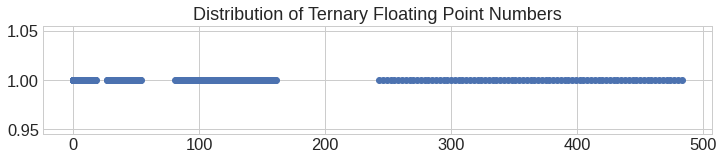

In [5]:
plt.figure(figsize=(12,2))
plt.plot(fp_ternary, np.ones_like(fp_ternary), "o");
plt.title('Distribution of Ternary Floating Point Numbers')

### Compare to the normalized binary system

1. How many numbers does each floating point system have?
2. How do the overflow and underflow levels compare?
3. How do each system's machine epsilon compare?

Use your previous function to compute the floating point numbers in the binary system for the same values of $n$, $L$ and $U$.

In [11]:
# Copy here the function "fp_numbers" from the first part of this GA

def fp_numbers(n,L,U):
    fp = np.empty([-(L-(U + 1))*(2**n)])
    i = 0
    for m in range(L,U + 1):
        for s in range(0,2**n):
            num = (1+s/2**n) * 2**m
            fp[i] = num
            i += 1
    return np.array(fp)

fp_ref = fp_numbers(n,L,U)

In [12]:
print('Binary system has %d numbers' % len(fp_ref))
print('Ternary system has %d numbers' % len(fp_ternary))
print()
print('Binary Overflow: ', fp_ref[-1])
print('Ternary Overflow: ', fp_ternary[-1])
print()
print('Binary Underflow: ', fp_ref[0])
print('Ternary Underflow: ',fp_ternary[0])

ind_b = np.argwhere(fp_ref==1.0)
ind_t = np.argwhere(fp_ternary==1.0)
eps_b = fp_ref[ind_b+1] - 1
eps_t = fp_ternary[ind_t+1] - 1
print()
print('Binary Machine Epsilon: ', eps_b)
print('Ternary Machine Epsilon: ',eps_t)

Binary system has 176 numbers
Ternary system has 594 numbers

Binary Overflow:  62.0
Ternary Overflow:  720.0

Binary Underflow:  0.03125
Ternary Underflow:  0.00411522633744856

Binary Machine Epsilon:  [[0.0625]]
Ternary Machine Epsilon:  [[0.03703704]]
